<a href="https://colab.research.google.com/github/AlexAlexeyuk/AlexAlexeyuk/blob/master/Alexeyuk_Spam_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Цель**: 
**Задачи**:
**Выводы**:

In [59]:
import numpy as np
import pandas as pd
import re
import nltk
import string
pd.options.mode.chained_assignment = None

full_df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = full_df.iloc[:,:2]
df = df.rename(columns={"v1":"target", "v2":"text"})

In [60]:
df["text"] = df["text"].str.lower()
df.head()

,target,text
0,ham,"go until jurong point, crazy.. available only in bugis n great wor..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives around here though"


In [61]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,target,text,text_wo_punct
0,ham,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though


In [62]:
stopwords = "i, me, my, myself, we, our, ours, ourselves, you, you're, you've, \
you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, \
she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, \
themselves, what, which, who, whom, this, that, that'll, these, those, am, is,\
 are, was, were, be, been, being, have, has, had, having, do, does, did, doing,\
  a, an, the, and, but, if, or, because, as, until, while, of, at, by, for,\
   with, about, against, between, into, through, during, before, after, above,\
    below, to, from, up, down, in, out, on, off, over, under, again, further, \
    then, once, here, there, when, where, why, how, all, any, both, each, few,\
     more, most, other, some, such, no, nor, not, only, own, same, so, than, \
     too, very, s, t, can, will, just, don, don't, should, should've, now, d, \
     ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, \
     doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, \
     ma, mightn, mightn't, mustn, mustn't, needn, needn't, shan, shan't,\
      shouldn, shouldn't, wasn, wasn't, weren, weren't, won, won't, wouldn,\
       wouldn't"


In [63]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in \
                     stopwords])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text:\
                                               remove_stopwords(text))
df.head()

,target,text,text_wo_punct,text_wo_stop
0,ham,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say
4,ham,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though


In [64]:
df.groupby("target").describe()

text  ... text_wo_stop
       count  ...         freq
target        ...             
ham     4825  ...           30
spam     747  ...            4

[2 rows x 12 columns]

In [65]:
df['target'] = df['target'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head(15)

,target,text,text_wo_punct,text_wo_stop
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though
5,1,freemsg hey there darling it's been 3 week's now and no word back!...,freemsg hey there darling its been 3 weeks now and no word back id...,freemsg darling 3 weeks word back like fun still tb ok xxx std chg...
6,0,even my brother is not like to speak with me. they treat me like a...,even my brother is not like to speak with me they treat me like ai...,even brother like speak treat like aids patent
7,0,as per your request 'melle melle (oru minnaminunginte nurungu vett...,as per your request melle melle oru minnaminunginte nurungu vettam...,per request melle melle oru minnaminunginte nurungu vettam set cal...
8,1,winner!! as a valued network customer you have been selected to re...,winner as a valued network customer you have been selected to rece...,winner valued network customer selected receivea å£900 prize rewar...
9,1,had your mobile 11 months or more? u r entitled to update to the l...,had your mobile 11 months or more u r entitled to update to the la...,mobile 11 months entitled update latest colour mobiles camera free...


In [66]:
df['length'] = df['text_wo_stop'].apply(len)

In [67]:
df.head(10)

,target,text,text_wo_punct,text_wo_stop,length
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43
5,1,freemsg hey there darling it's been 3 week's now and no word back!...,freemsg hey there darling its been 3 weeks now and no word back id...,freemsg darling 3 weeks word back like fun still tb ok xxx std chg...,82
6,0,even my brother is not like to speak with me. they treat me like a...,even my brother is not like to speak with me they treat me like ai...,even brother like speak treat like aids patent,46
7,0,as per your request 'melle melle (oru minnaminunginte nurungu vett...,as per your request melle melle oru minnaminunginte nurungu vettam...,per request melle melle oru minnaminunginte nurungu vettam set cal...,113
8,1,winner!! as a valued network customer you have been selected to re...,winner as a valued network customer you have been selected to rece...,winner valued network customer selected receivea å£900 prize rewar...,122
9,1,had your mobile 11 months or more? u r entitled to update to the l...,had your mobile 11 months or more u r entitled to update to the la...,mobile 11 months entitled update latest colour mobiles camera free...,102


In [68]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('call', 576),
 ('2', 478),
 ('get', 386),
 ('4', 287),
 ('dont', 279),
 ('go', 278),
 ('ok', 277),
 ('ltgt', 276),
 ('free', 275),
 ('know', 257)]

In [69]:
from nltk.stem.porter import PorterStemmer

# Drop the two columns 
#df.drop(["text_wo_stopfreq", "text_wo_stopfreqrare"], axis=1, inplace=True) 

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text_wo_stop"].apply(lambda text: stem_words(text))

df.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though


In [70]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though


In [71]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda text: lemmatize_words(text))

df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though


In [72]:

df.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though


In [73]:
data = df.drop(['text', 'text_stemmed', 'text_wo_punct', 'text_wo_stop', 'length' ], axis = 1)
data.head()

,target,text_lemmatized
0,0,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar joking wif oni
2,1,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,dun say early hor already say
4,0,nah dont think go usf life around though


In [74]:
#!pip install h2o
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,25 mins 55 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 16 days
H2O_cluster_name:,H2O_from_python_unknownUser_ihy66g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.165 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [79]:
from h2o.estimators.word2vec import H2OWord2vecEstimator
from h2o.estimators import H2OKMeansEstimator

In [80]:
def tokenize(sentences, stop_word = stopwords):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | \
                                         (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",\
                                          invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) |\
                                      (~ tokenized_words.isin(stopwords)),:]
    return tokenized_words

In [81]:
df = h2o.H2OFrame(data, column_names=['target', 'text_lemmatized'],
                    column_types=["enum", "string"])
                            

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [82]:
words = tokenize(df["text_lemmatized"])

In [83]:
words.head()


C1
go
jurong
point
crazy
available
bugis
great
world
la
buffet


In [84]:
# Train Word2Vec Model for vec size = 100
w2v_model = H2OWord2vecEstimator(vec_size = 100, model_id = "w2v.hex")
w2v_model.train(training_frame=words)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [85]:
# Sanity check - find synonyms for the word 'free'
w2v_model.find_synonyms("free", count = 5)

OrderedDict([('colour', 0.9173692464828491),
             ('flag', 0.9007233381271362),
             ('camcorder', 0.8998816013336182),
             ('sub', 0.8930215239524841),
             ('bluetooth', 0.8921520113945007)])

In [86]:
# Sanity check - find synonyms for the word 'hello'
w2v_model.find_synonyms("hello", count = 5)

OrderedDict([('girl', 0.788882851600647),
             ('real', 0.7618305683135986),
             ('name', 0.7579766511917114),
             ('vry', 0.7282080054283142),
             ('coz', 0.716119647026062)])

In [87]:
word_embeddings = w2v_model.to_frame()
word_embeddings.head()

Word,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
ray,0.00129979,-0.243375,0.0157942,0.0440503,-0.0251585,-0.0323189,-0.0413755,-0.0536854,-0.0346984,-0.0701184,-0.0806507,-0.0267513,-0.0177979,0.0831957,0.00757129,0.00431923,0.0276812,-0.0558573,-0.117119,-0.0384936,-0.0202893,0.0101422,0.0566275,0.0676222,-0.124181,0.0615573,0.0439659,0.0433282,0.0692751,-0.102223,0.0368478,0.0989014,0.0414564,0.0829075,0.108182,0.027143,-0.0328255,0.109586,0.145255,0.0396244,-0.183067,0.0703485,-0.0176613,-0.104864,-0.0492184,0.0777936,0.00731295,0.192323,-0.0506074,0.175471,-0.0243124,-0.0130782,0.0411229,0.109537,-0.121683,0.00735484,0.138422,-0.141087,-0.108326,0.051899,-0.122491,-0.0738637,0.0831814,0.0402169,-0.0463752,0.1074,0.211045,-0.0450877,0.129985,-0.0602739,-0.0952968,0.0418557,0.163372,-0.0761918,-0.090979,-0.0652691,0.0931536,-0.0716259,0.0241392,0.0147536,-0.0180172,0.016662,-1.94059e-06,0.00780688,-0.0583693,-0.00738719,-0.0692142,-0.0860126,0.178876,0.0243458,0.0531582,-0.0240576,0.00958132,-0.0120668,0.0458828,0.135949,-0.0472349,-0.14774,-0.107806,0.0137643
moral,0.0164332,-0.199814,0.00585143,0.100369,0.0243223,-0.077019,0.0398873,-0.0725712,-0.0580223,-6.3459e-05,-0.0500566,-0.0302626,-0.0121954,-0.0603222,0.00702417,-0.0776347,-0.143232,0.0355928,-0.00352215,0.0304927,0.0221532,-0.0568746,0.0340293,-0.0079966,-0.0469132,0.0450055,0.0285017,0.0226418,0.0131366,-0.0492807,-0.00559238,0.0972631,0.035139,0.0207279,0.0762538,-0.131295,-0.0434351,0.13475,0.00735761,-0.00696358,-0.142696,-0.0178889,-0.0694823,0.0534676,-0.0305824,0.0502116,0.133238,0.131562,-0.033101,0.210067,-0.00556393,-0.00431489,-0.0395759,0.0318459,0.00573968,-0.105272,0.209182,-0.051853,0.052345,0.0165174,-0.142621,-0.0204373,0.157017,0.062221,0.00979738,-0.0160317,-0.14915,0.0226609,0.150564,0.0259161,-0.0629544,-0.0267433,0.013639,-0.0094574,-0.117575,-0.12162,0.036679,-0.0194482,-0.0433678,-0.0417612,0.00886466,-0.00486904,0.029883,-0.119658,-0.00235265,0.0504534,0.0466107,-0.0269053,0.0696162,-0.00961437,-0.0172399,-0.127308,0.0402618,0.109693,0.0473123,0.0390516,0.0690017,0.0209056,0.0134948,-0.0552714
wet,0.0691346,-0.0415695,-0.0842516,0.104688,-0.0393524,-0.0148344,0.0115311,-0.0381186,-0.0822772,-0.0384811,-0.0087394,-0.148552,-0.00701963,0.0476237,-0.0204358,-0.0418471,-0.0659575,0.0676905,-0.0304304,-0.0617536,0.036451,-0.0186651,0.0656401,0.123571,0.00102703,0.05419,-0.0451737,0.024712,-0.0221328,-0.0306587,0.0528137,0.160171,0.0317935,0.00335125,-0.000437672,-0.0290139,-0.0279447,0.126324,0.130722,-0.0591819,-0.224134,0.00784138,-0.0528123,-0.046373,0.0571486,0.046233,0.078661,0.0360617,0.0308484,0.149505,-0.0326603,0.00818763,-0.0208447,-0.0201438,0.0152244,0.0423304,0.107495,-0.122162,0.0695565,-0.0275196,-0.115068,0.061303,0.0811203,-0.00135806,0.0530671,-0.017119,0.00186598,0.0918775,-0.0119475,-0.00737819,-0.0306073,-0.056297,0.0536367,0.00120726,-0.0570527,-0.0604223,0.0711111,-0.0133608,-0.00231559,-0.00515187,-0.0157176,0.0519024,0.0012077,-0.0860957,0.0256486,-0.0219642,-0.0479471,0.0380067,0.0478757,0.0256109,-0.0417721,-0.0605813,-0.0056263,0.00769204,0.0651249,0.139671,-0.0569615,-0.0879365,0.011035,-0.0341706
art,0.0125054,-0.0979841,-0.0266804,0.102297,0.0225544,-0.0505445,0.0250675,-0.037094,-0.0488987,-0.0439658,-0.0131664,-0.0727373,-0.0200139,0.00132282,0.00137289,-0.068129,-0.0647869,0.0207093,-0.049588,-0.026275,0.0624002,-0.0135699,0.0536189,0.070423,-0.00698982,0.0515368,-0.00359298,0.0189455,-0.0174956,-0.0426716,-0.00738257,0.0743196,0.000366461,0.0352519,0.0361015,-0.0364412,-0.0434045,0.122616,0.0538945,-0.0224369,-0.131837,0.013061,-0.0494664,-0.0119861,0.00285293,0.021017

In [88]:

from h2o.estimators import H2OKMeansEstimator

kmeans = H2OKMeansEstimator(model_id = "word_segments.hex",
                            estimate_k = True, k = 2, # Max number of clusters
                            seed = 1234)

In [89]:
x = list(set(word_embeddings.col_names) - set(["Word"]))
kmeans.train(x = x, training_frame = word_embeddings)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [90]:
# Clusters
kmeans.centroid_stats()


Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,1165.0,62246.733659
1,,2.0,241.0,50441.060443


In [91]:
word_clusters = word_embeddings.cbind(kmeans.predict(word_embeddings))
word_clusters[["Word", "predict"]].head()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


Word,predict
ray,0
moral,0
wet,0
art,0
jazz,0
island,1
cartoon,0
bin,0
bar,0
plane,0


In [92]:
selected_words = ['2', 'get', 'ltgt',
 'ok',  'dont', 'go','know', 'got', 'like', 'call' ,'free', 'txt','mobile',
 'text', 'claim', 'stop', 'reply']
selected_clusters = word_clusters[word_clusters["Word"].isin(selected_words)]

In [93]:
print("Cluster 1")
print(selected_clusters[selected_clusters["predict"] == 0, "Word"])

Cluster 1


Word
like
ltgt
ok
dont
know
go
get


In [94]:
print("Cluster 2")
print(selected_clusters[selected_clusters["predict"] == 1, "Word"])

Cluster 2


Word
claim
mobile
reply
stop
txt
text
free
call


In [95]:
# Calculate a vector for each review
review_vecs = w2v_model.transform(words, aggregate_method = "AVERAGE")

In [96]:
review_vecs.dim

[5572, 100]

In [97]:
type(df)

h2o.frame.H2OFrame

In [98]:
# Add aggregated word embeddings 
ext_df = df.cbind(review_vecs)

In [99]:
train,test  = ext_df.split_frame(ratios=[.8])

In [100]:
train.dim

[4467, 102]

In [101]:
test.dim

[1105, 102]

In [102]:
from h2o.estimators import H2OGradientBoostingEstimator
predictors = review_vecs.names
response = 'target'

gbm_embeddings = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10,
                                              model_id = "gbm_embeddings.hex", ntrees = 1000,
                                             )
gbm_embeddings.train(x = predictors, y = response, 
                   training_frame = train, validation_frame = test
                  )

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [103]:
gbm_embeddings.auc

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_embeddings.hex


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,140.0,140.0,46207.0,5.0,5.0,5.0,15.0,30.0,21.564285




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0003602932331459542
RMSE: 0.018981391759983098
LogLoss: 0.004505947134204536
Mean Per-Class Error: 0.0008319467554076532
AUC: 0.9999367324505717
AUCPR: 0.9996739508720425
Gini: 0.9998734649011434

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7556980069354282: 


,,0,1,Error,Rate
0,0,3866.0,0.0,0.0,(0.0/3866.0)
1,1,1.0,600.0,0.0017,(1.0/601.0)
2,Total,3867.0,600.0,0.0002,(1.0/4467.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.755698,0.999167,169.0
1,max f2,0.755698,0.998668,169.0
2,max f0point5,0.755698,0.999667,169.0
3,max accuracy,0.755698,0.999776,169.0
4,max precision,0.999693,1.000000,0.0
5,max recall,0.013186,1.000000,242.0
6,max specificity,0.999693,1.000000,0.0
7,max absolute_mcc,0.755698,0.999039,169.0
8,max min_per_class_accuracy,0.755698,0.998336,169.0
9,max mean_per_class_accuracy,0.755698,0.999168,169.0



Gains/Lift Table: Avg response rate: 13.45 %, avg score: 13.46 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010074,0.999370,7.432612,7.432612,1.000000,0.999545,1.000000,0.999545,0.074875,0.074875,643.261231,643.261231,0.074875
1,2,0.020372,0.999124,7.432612,7.432612,1.000000,0.999224,1.000000,0.999383,0.076539,0.151414,643.261231,643.261231,0.151414
2,3,0.030222,0.998900,7.432612,7.432612,1.000000,0.999016,1.000000,0.999263,0.073211,0.224626,643.261231,643.261231,0.224626
3,4,0.040072,0.998522,7.432612,7.432612,1.000000,0.998724,1.000000,0.999131,0.073211,0.297837,643.261231,643.261231,0.297837
4,5,0.050146,0.998041,7.432612,7.432612,1.000000,0.998310,1.000000,0.998966,0.074875,0.372712,643.261231,643.261231,0.372712
5,6,0.100067,0.991290,7.432612,7.432612,1.000000,0.995860,1.000000,0.997416,0.371048,0.743760,643.261231,643.261231,0.743760
6,7,0.149989,0.018527,5.099505,6.656071,0.686099,0.667922,0.895522,0.887749,0.254576,0.998336,409.950531,565.607073,0.980230
7,8,0.200134,0.006986,0.033181,4.996644,0.004464,0.011848,0.672260,0.668284,0.001664,1.000000,-96.681870,399.664430,0.924211
8,9,0.299978,0.002196,0.000000,3.333582,0.000000,0.003695,0.448507,0.447085,0.000000,1.000000,-100.000000,233.358209,0.808846
9,10,0.400045,0.001189,0.000000,2.499720,0.000000,0.001627,0.336318,0.335658,0.000000,1.000000,-100.000000,149.972020,0.693223




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.02086366245549643
RMSE: 0.14444259224860384
LogLoss: 0.08931382156280028
Mean Per-Class Error: 0.05197337409116232
AUC: 0.9866227662947991
AUCPR: 0.9547092158594539
Gini: 0.9732455325895981

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7171469987921112: 


,,0,1,Error,Rate
0,0,952.0,7.0,0.0073,(7.0/959.0)
1,1,16.0,130.0,0.1096,(16.0/146.0)
2,Total,968.0,137.0,0.0208,(23.0/1105.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.717147,0.918728,110.0
1,max f2,0.155966,0.904184,130.0
2,max f0point5,0.920066,0.942368,97.0
3,max accuracy,0.717147,0.979186,110.0
4,max precision,0.999652,1.000000,0.0
5,max recall,0.000587,1.000000,346.0
6,max specificity,0.999652,1.000000,0.0
7,max absolute_mcc,0.717147,0.907410,110.0
8,max min_per_class_accuracy,0.019458,0.941606,166.0
9,max mean_per_class_accuracy,0.049057,0.948027,142.0



Gains/Lift Table: Avg response rate: 13.21 %, avg score: 13.08 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010860,0.999339,7.568493,7.568493,1.000000,0.999502,1.000000,0.999502,0.082192,0.082192,656.849315,656.849315,0.082192
1,2,0.020814,0.998851,7.568493,7.568493,1.000000,0.999037,1.000000,0.999280,0.075342,0.157534,656.849315,656.849315,0.157534
2,3,0.030769,0.998480,7.568493,7.568493,1.000000,0.998700,1.000000,0.999092,0.075342,0.232877,656.849315,656.849315,0.232877
3,4,0.040724,0.997840,7.568493,7.568493,1.000000,0.998119,1.000000,0.998854,0.075342,0.308219,656.849315,656.849315,0.308219
4,5,0.050679,0.996893,7.568493,7.568493,1.000000,0.997470,1.000000,0.998582,0.075342,0.383562,656.849315,656.849315,0.383562
5,6,0.100452,0.969539,7.293275,7.432124,0.963636,0.990632,0.981982,0.994643,0.363014,0.746575,629.327522,643.212390,0.744490
6,7,0.150226,0.079563,3.577833,6.155100,0.472727,0.576400,0.813253,0.856069,0.178082,0.924658,257.783313,515.509985,0.892332
7,8,0.200000,0.013100,0.550436,4.760274,0.072727,0.025582,0.628959,0.649386,0.027397,0.952055,-44.956413,376.027397,0.866549
8,9,0.300452,0.002546,0.272738,3.259923,0.036036,0.005125,0.430723,0.433986,0.027397,0.979452,-72.726151,225.992325,0.782372
9,10,0.400000,0.001278,0.137609,2.482877,0.018182,0.001726,0.328054,0.326410,0.013699,0.993151,-86.239103,148.287671,0.683453




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-14 12:35:56,0.092 sec,0.0,0.341234,0.394931,0.500000,0.134542,1.000000,0.865458,0.338637,0.390435,0.500000,0.132127,1.000000,0.867873
1,,2020-11-14 12:35:57,1.345 sec,10.0,0.173815,0.139310,0.985381,0.962995,7.432612,0.019028,0.190763,0.157083,0.978841,0.921976,7.420091,0.026244
2,,2020-11-14 12:35:57,1.873 sec,20.0,0.125992,0.083167,0.987949,0.973088,7.432612,0.012984,0.161879,0.114065,0.982241,0.931170,7.568493,0.026244
3,,2020-11-14 12:35:58,2.488 sec,30.0,0.105985,0.060150,0.990652,0.978553,7.432612,0.010298,0.156432,0.101522,0.983937,0.938335,7.568493,0.025339
4,,2020-11-14 12:35:58,3.038 sec,40.0,0.093618,0.047647,0.992690,0.982466,7.432612,0.008059,0.154915,0.096643,0.983898,0.940734,7.568493,0.026244
5,,2020-11-14 12:35:59,3.573 sec,50.0,0.082345,0.036916,0.996496,0.988660,7.432612,0.005597,0.154661,0.093402,0.985491,0.945676,7.568493,0.026244
6,,2020-11-14 12:36:00,4.122 sec,60.0,0.071259,0.027169,0.998704,0.995569,7.432612,0.004925,0.151523,0.088307,0.986783,0.948691,7.568493,0.024434
7,,2020-11-14 12:36:00,4.760 sec,70.0,0.059418,0.020354,0.999564,0.998279,7.432612,0.002015,0.149384,0.086655,0.986912,0.950077,7.568493,0.025339
8,,2020-11-14 12:36:01,5.335 sec,80.0,0.047824,0.015235,0.999755,0.999094,7.432612,0.000895,0.148670,0.086013,0.987644,0.951434,7.568493,0.024434
9,,2020-11-14 12:36:01,5.934 sec,90.0,0.039036,0.011803,0.999837,0.999357,7.432612,0.000224,0.147219,0.085824,0.987544,0.952332,7.568493,0.022624



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C59,1531.148560,1.000000,0.639360
1,C27,102.232300,0.066768,0.042689
2,C82,51.040531,0.033335,0.021313
3,C42,48.497765,0.031674,0.020251
4,C67,48.078392,0.031400,0.020076
5,C19,39.087105,0.025528,0.016322
6,C30,31.669756,0.020684,0.013224
7,C25,31.310200,0.020449,0.013074
8,C51,31.302296,0.020444,0.013071
9,C10,26.093792,0.017042,0.010896



See the whole table with table.as_data_frame()


<bound method ModelBase.auc of >

In [104]:
gbm_embeddings.confusion_matrix(valid = True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7171469987921112: 


,,0,1,Error,Rate
0,0,952.0,7.0,0.0073,(7.0/959.0)
1,1,16.0,130.0,0.1096,(16.0/146.0)
2,Total,968.0,137.0,0.0208,(23.0/1105.0)


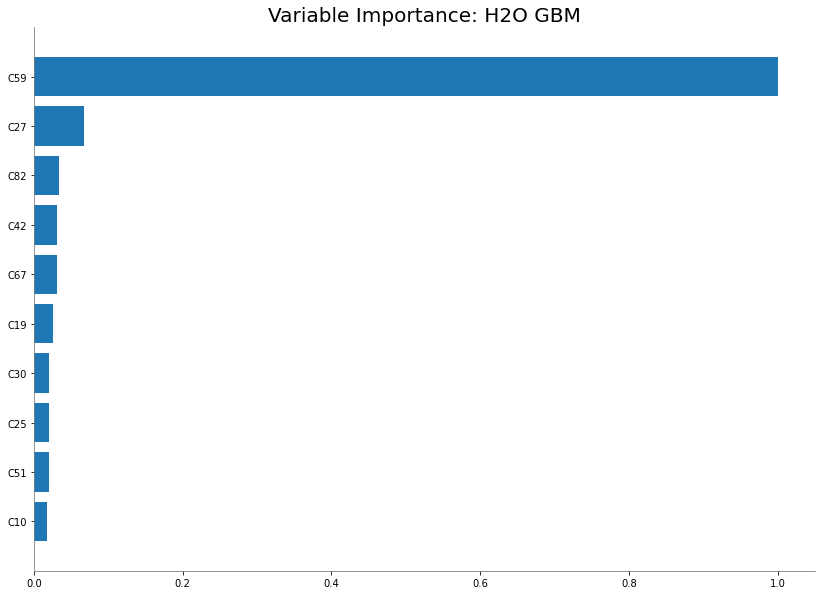

In [105]:
gbm_embeddings.varimp_plot()

In [106]:
top_w2v_features = list(filter(lambda x: x.startswith('C'), map(lambda x: x[0], gbm_embeddings.varimp())))[1:10]
top_w2v_features

['C27', 'C82', 'C42', 'C67', 'C19', 'C30', 'C25', 'C51', 'C10']

In [107]:
from h2o.estimators import H2OGeneralizedLinearEstimator

glm_predictors =  review_vecs.names

glm_embeddings = H2OGeneralizedLinearEstimator(model_id = "glm_embeddings.hex", interactions = top_w2v_features,
                                               family = "binomial"
                                              )
glm_embeddings.train(x = glm_predictors, y = response,
                     training_frame = train, validation_frame = test
                    )

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [108]:
print(glm_embeddings.auc)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_embeddings.hex


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 4.985E-4 )",136,84,7,py_56_sid_8186




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.0251086545045021
RMSE: 0.15845710619755146
LogLoss: 0.09447110785757572
Null degrees of freedom: 4466
Residual degrees of freedom: 4382
Null deviance: 3528.312806320258
Residual deviance: 844.0048775995812
AIC: 1014.0048775995812
AUC: 0.9826567292140277
AUCPR: 0.9397485573556944
Gini: 0.9653134584280554

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47373145222359475: 


,,0,1,Error,Rate
0,0,3816.0,50.0,0.0129,(50.0/3866.0)
1,1,82.0,519.0,0.1364,(82.0/601.0)
2,Total,3898.0,569.0,0.0296,(132.0/4467.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.473731,0.887179,162.0
1,max f2,0.143639,0.895499,258.0
2,max f0point5,0.676030,0.910666,121.0
3,max accuracy,0.514854,0.970450,155.0
4,max precision,0.999906,1.000000,0.0
5,max recall,0.001268,1.000000,392.0
6,max specificity,0.999906,1.000000,0.0
7,max absolute_mcc,0.473731,0.870624,162.0
8,max min_per_class_accuracy,0.143639,0.946755,258.0
9,max mean_per_class_accuracy,0.143639,0.946994,258.0



Gains/Lift Table: Avg response rate: 13.45 %, avg score: 13.46 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010074,9.985177e-01,7.432612,7.432612,1.000000,0.999540,1.000000,0.999540,0.074875,0.074875,643.261231,643.261231,0.074875
1,2,0.020148,9.950033e-01,7.432612,7.432612,1.000000,0.996500,1.000000,0.998020,0.074875,0.149750,643.261231,643.261231,0.149750
2,3,0.030445,9.897146e-01,7.432612,7.432612,1.000000,0.992186,1.000000,0.996047,0.076539,0.226290,643.261231,643.261231,0.226290
3,4,0.040072,9.817245e-01,7.432612,7.432612,1.000000,0.985298,1.000000,0.993464,0.071547,0.297837,643.261231,643.261231,0.297837
4,5,0.050146,9.669179e-01,7.267443,7.399431,0.977778,0.975733,0.995536,0.989902,0.073211,0.371048,626.744315,639.943101,0.370790
5,6,0.100067,7.884406e-01,6.866001,7.133312,0.923767,0.899892,0.959732,0.944998,0.342762,0.713810,586.600061,613.331249,0.709154
6,7,0.149989,2.467533e-01,3.866292,6.045931,0.520179,0.510082,0.813433,0.800242,0.193012,0.906822,286.629161,504.593091,0.874489
7,8,0.200134,7.927654e-02,1.028620,4.788797,0.138393,0.145185,0.644295,0.636111,0.051581,0.958403,2.862045,378.879719,0.876147
8,9,0.299978,2.179062e-02,0.183316,3.255928,0.024664,0.042428,0.438060,0.438512,0.018303,0.976705,-81.668445,225.592793,0.781931
9,10,0.400045,9.555854e-03,0.083139,2.462287,0.011186,0.014837,0.331281,0.332534,0.008319,0.985025,-91.686116,146.228679,0.675920




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.026383610903648564
RMSE: 0.16243032630530718
LogLoss: 0.10216019478359001
Null degrees of freedom: 1104
Residual degrees of freedom: 1020
Null deviance: 862.8607938683491
Residual deviance: 225.77403047173397
AIC: 395.77403047173397
AUC: 0.9836944876940876
AUCPR: 0.9078830839723087
Gini: 0.9673889753881753

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3781900955160786: 


,,0,1,Error,Rate
0,0,941.0,18.0,0.0188,(18.0/959.0)
1,1,14.0,132.0,0.0959,(14.0/146.0)
2,Total,955.0,150.0,0.029,(32.0/1105.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.378190,0.891892,126.0
1,max f2,0.378190,0.899183,126.0
2,max f0point5,0.585400,0.907781,113.0
3,max accuracy,0.585400,0.971946,113.0
4,max precision,0.999826,1.000000,0.0
5,max recall,0.007882,1.000000,330.0
6,max specificity,0.999826,1.000000,0.0
7,max absolute_mcc,0.378190,0.875283,126.0
8,max min_per_class_accuracy,0.120959,0.928050,175.0
9,max mean_per_class_accuracy,0.378190,0.942670,126.0



Gains/Lift Table: Avg response rate: 13.21 %, avg score: 13.47 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010860,9.956132e-01,6.937785,6.937785,0.916667,0.998208,0.916667,0.998208,0.075342,0.075342,593.778539,593.778539,0.074300
1,2,0.020814,9.894620e-01,7.568493,7.239428,1.000000,0.991449,0.956522,0.994975,0.075342,0.150685,656.849315,623.942823,0.149642
2,3,0.031674,9.844780e-01,6.937785,7.136008,0.916667,0.986274,0.942857,0.991992,0.075342,0.226027,593.778539,613.600783,0.223942
3,4,0.040724,9.783090e-01,6.811644,7.063927,0.900000,0.981727,0.933333,0.989711,0.061644,0.287671,581.164384,606.392694,0.284543
4,5,0.050679,9.506538e-01,7.568493,7.163038,1.000000,0.963340,0.946429,0.984531,0.075342,0.363014,656.849315,616.303816,0.359885
5,6,0.100452,8.022971e-01,7.155666,7.159385,0.945455,0.884681,0.945946,0.935056,0.356164,0.719178,615.566625,615.938541,0.712922
6,7,0.150226,2.209989e-01,3.715442,6.018320,0.490909,0.531373,0.795181,0.801305,0.184932,0.904110,271.544209,501.831985,0.868656
7,8,0.200000,7.684240e-02,0.963263,4.760274,0.127273,0.144050,0.628959,0.637735,0.047945,0.952055,-3.673724,376.027397,0.866549
8,9,0.300452,2.357012e-02,0.340923,3.282720,0.045045,0.041710,0.433735,0.438462,0.034247,0.986301,-65.907689,228.271992,0.790264
9,10,0.400000,1.007881e-02,0.068804,2.482877,0.009091,0.014876,0.328054,0.333044,0.006849,0.993151,-93.119552,148.287671,0.683453




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-14 12:36:37,0.000 sec,0,1764.156403,0.394931,,,,,,,,,,,,,,
1,,2020-11-14 12:36:37,0.215 sec,1,645.711449,0.149262,,,,,,,,,,,,,,
2,,2020-11-14 12:36:37,0.323 sec,2,507.118854,0.119845,,,,,,,,,,,,,,
3,,2020-11-14 12:36:37,0.433 sec,3,447.366625,0.107229,,,,,,,,,,,,,,
4,,2020-11-14 12:36:37,0.533 sec,4,427.882658,0.103767,,,,,,,,,,,,,,
5,,2020-11-14 12:36:37,0.627 sec,5,423.417635,0.102983,,,,,,,,,,,,,,
6,,2020-11-14 12:36:37,0.741 sec,6,421.868384,0.102910,,,,,,,,,,,,,,
7,,2020-11-14 12:36:38,0.862 sec,7,422.002439,0.102913,0.158457,0.0944711,0.784365,NaN,NaN,7.43261,0.02955,0.16243,0.10216,0.769916,0.983694,0.907883,6.93779,0.0289593


<bound method ModelBase.auc of >


In [109]:
glm_embeddings.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3781900955160786: 


,,0,1,Error,Rate
0,0,941.0,18.0,0.0188,(18.0/959.0)
1,1,14.0,132.0,0.0959,(14.0/146.0)
2,Total,955.0,150.0,0.029,(32.0/1105.0)


In [110]:
kmeans.train(x=predictors,
            training_frame=train,
            validation_frame=test)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [111]:
pred = kmeans.predict(test)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [120]:
pred

predict
0
0
0
0
0
0
0
0
0
0


In [115]:
test['labels'] =  pred

In [138]:
#' Add  Column: "prediction"
test["prediction_2"] = (test["labels"] == 0 and test['target']\
                      == '0').ifelse("True", "False")

In [139]:
test["prediction_2"].table()

prediction_2,Count
False,146
True,959


In [140]:
m = 146 / 959 * 100
print('Вероятность ошибки второго рода при проведении кластеризации составила: ' + str(m)+'%')

Вероятность ошибки второго рода при проведении кластеризации составила: 15.224191866527633%


In [141]:
test["prediction_1"] = (test["labels"] == 1 and test['target']\
                      == '1').ifelse("True", "False")

In [142]:
test["prediction_1"].table()

prediction_1,Count
False,959
True,146


In [ ]:
from h2o.automl import H2OAutoML

automl = H2OAutoML(project_name = 'text_lemmatized', max_runtime_secs = 180, 
                   keep_cross_validation_models = False, keep_cross_validation_predictions = False,
                   nfolds = 3, exclude_algos = ["DRF"], seed = 1234)
automl.train(x = predictors, y = response, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
automl.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20201114_115004,0.991924,0.0780316,0.949686,0.0527374,0.138883,0.0192884
StackedEnsemble_AllModels_AutoML_20201114_115004,0.99131,0.0816326,0.951083,0.0572419,0.1436,0.0206211
XGBoost_grid__1_AutoML_20201114_115004_model_3,0.990409,0.0702217,0.952388,0.0557034,0.138428,0.0191624
XGBoost_grid__1_AutoML_20201114_115004_model_5,0.989619,0.078351,0.937056,0.0677893,0.149222,0.0222673
XGBoost_grid__1_AutoML_20201114_115004_model_4,0.989152,0.0855027,0.946445,0.0372834,0.148931,0.0221805
DeepLearning_1_AutoML_20201114_115004,0.98802,0.0858935,0.913407,0.0458905,0.156787,0.0245821
GBM_2_AutoML_20201114_115004,0.98784,0.142026,0.936839,0.059806,0.176957,0.0313138
XGBoost_grid__1_AutoML_20201114_115004_model_2,0.987568,0.0854513,0.918583,0.0882606,0.154077,0.0237397
XGBoost_grid__1_AutoML_20201114_115004_model_1,0.987156,0.082085,0.929476,0.071781,0.153567,0.0235829
GBM_grid__1_AutoML_20201114_115004_model_2,0.986713,0.0800844,0.938841,0.0747471,0.149168,0.0222512


In [ ]:
h2o.cluster().shutdown()

H2O session _sid_b057 closed.
